# Manali Ramchandani (ubid:manaliba)(50495140)


# Tehaseen Hussain Mohammad (ubid:tehaseen) (50540008)

Importing Libraries Which are necessary for the project

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud 
import nltk




Loading Dataset

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


DATA PREPROCESSING AND DATA CLEANING 



Below we are showing the sum of missing values in the dataset

In [3]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

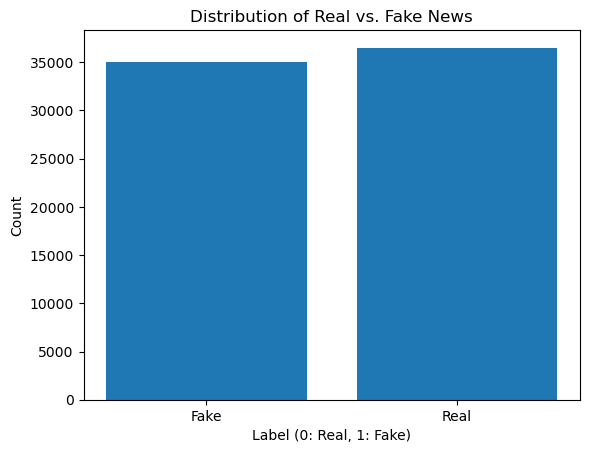

In [6]:
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label (0: Real, 1: Fake)')
plt.ylabel('Count')
plt.title('Distribution of Real vs. Fake News')
plt.xticks(label_counts.index, ['Real', 'Fake'])
plt.show()

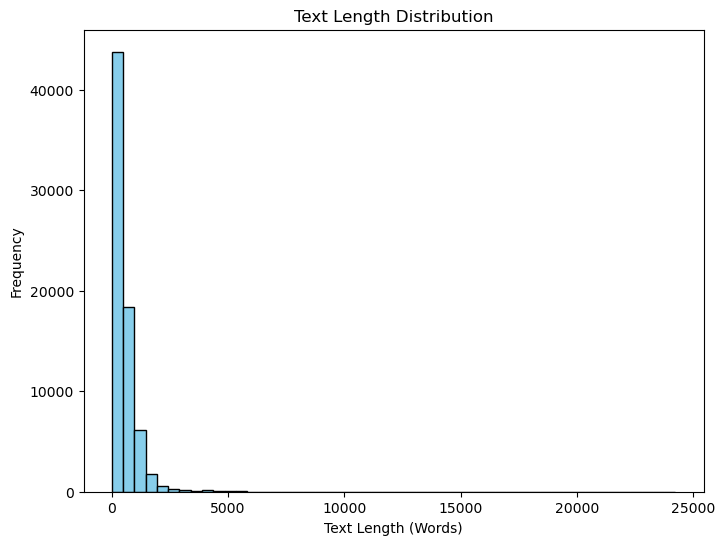

In [7]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Text Length (Words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

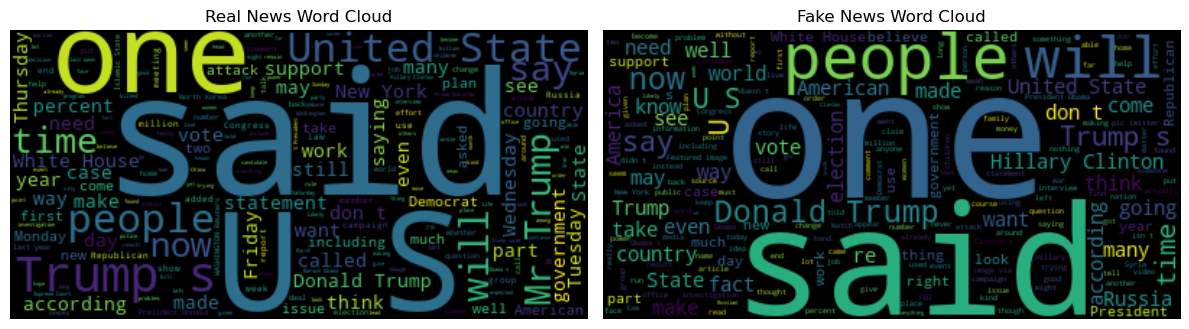

In [8]:
real_wordcloud = WordCloud().generate(" ".join(df[df['label'] == 0]['text']))
fake_wordcloud = WordCloud().generate(" ".join(df[df['label'] == 1]['text']))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

PUNKT: This is used for tokenization, breaking down text into words or sentences for easier analysis.

STOPWORDS: These are common words like "the", "is", and "in", often removed in text processing to focus on more significant words.

WORDNET: A comprehensive English database grouping words into synonym sets (synsets) with definitions and usage examples.



In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manaliramchandani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manaliramchandani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manaliramchandani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

TOKENIZING AND REMOVING STOP WORDS FROM THE DATA AND ALSO APPLYING LEMMATIZATION

The TfidfVectorizer is a method that changes raw text into a form that machine learning models can use. It works by figuring out how important each word is in a document. This isn't just about how often a word appears in that document, but also how rare the word is across all the documents you have. In simpler terms, it helps understand which words are common and which ones are special, making the text ready for machine learning tasks.

TF-IDF is useful in fake news detection as it:

-Identifies Key Words: It pinpoints specific words that are more common in fake news, helping to differentiate it from real news.

-Simplifies Text Data: It reduces text complexity by emphasizing important terms, leading to more streamlined and effective machine learning models.

-Improves accuracy in spotting fake news.

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
df['processed_text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x) if word.lower() not in stop_words]))
df['processed_text'] = df['processed_text'].str.lower()
print(df)

                                                   title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
5      About Time! Christian Group Sues Amazon and SP...   
...                                                  ...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  text_length  \
0      No comment is expected from Barack Obama Membe...      1          871   
2       Now, most of the demonstrators gathered last ...      1           34   
3      A dozen politically active pasto

In [11]:
df

,title,text,label,text_length,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,871,comment expected barack obama members # fyf911...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,34,", demonstrator gathered last night exercising ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,1321,dozen politically active pastor came private d...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,329,"rs-28 sarmat missile , dubbed satan 2 , replac..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,244,say one time someone sued southern poverty law...
...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,735,washington ( reuters ) - hackers believed work...
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,604,"know , fantasyland republicans never questione..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,477,migrants refuse leave train refugee camp hunga...
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,559,mexico city ( reuters ) - donald trump ’ comba...


TF-IDF (Term Frequency-Inverse Document Frequency)
 
TF-IDF quantifies the significance of words in a document, weighing their frequency against their uniqueness in the entire document collection, for effective text analysis.








In [12]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['processed_text'])


In [13]:
print(X)

  (0, 132047)	0.013692714221988178
  (0, 180274)	0.018562988632759847
  (0, 65163)	0.02187130382874481
  (0, 73475)	0.028556006138883993
  (0, 35302)	0.041741381986832506
  (0, 129898)	0.038479299960997526
  (0, 206118)	0.046089557395127795
  (0, 19131)	0.023836070497736644
  (0, 145428)	0.04821762131478684
  (0, 138392)	0.037169432555761425
  (0, 154944)	0.04433408014722313
  (0, 42625)	0.028730903927983574
  (0, 13464)	0.06026110019943663
  (0, 209804)	0.0216307996034532
  (0, 87150)	0.01664374873930058
  (0, 112252)	0.07008212106846147
  (0, 133706)	0.07008212106846147
  (0, 120593)	0.07008212106846147
  (0, 173118)	0.043655365376588706
  (0, 89743)	0.06337823138708898
  (0, 106003)	0.03867137183146973
  (0, 106222)	0.03938566771375531
  (0, 107978)	0.03954732334902331
  (0, 196323)	0.03483551167498815
  (0, 147590)	0.018933586147622666
  :	:
  (71536, 2847)	0.022046889424166494
  (71536, 164104)	0.026506453974856098
  (71536, 147669)	0.04288139343984818
  (71536, 209108)	0.01518712

SPLITTING THE DATA

In [14]:
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-In this analysis, three machine learning algorithms - Naive Bayes and LogisticRegression - are employed to determine which yields the highest accuracy. A loop is programmed to assess each algorithm's performance on both training and testing datasets. The model that demonstrates the highest accuracy is then selected for further use. To facilitate a clear comparison among these algorithms, their accuracies on the training and testing sets are visualized using subplots. This comparative visualization aids in understanding how each algorithm performs and in making an informed decision about which model is the most effective for the given task.


-Naive Bayes and Logistic Regression are well-suited for fake news detection as they handle text data efficiently. Naive Bayes excels in calculating the likelihood of news being fake based on specific keywords, and Logistic Regression effectively assigns importance to different words, aiding in classification. Their ability to quickly process large datasets and provide interpretable results makes them ideal for identifying fake news.

Naive Bayes Model - Train Accuracy: 0.8987, Test Accuracy: 0.8840
Logistic Regression Model - Train Accuracy: 0.9716, Test Accuracy: 0.9555


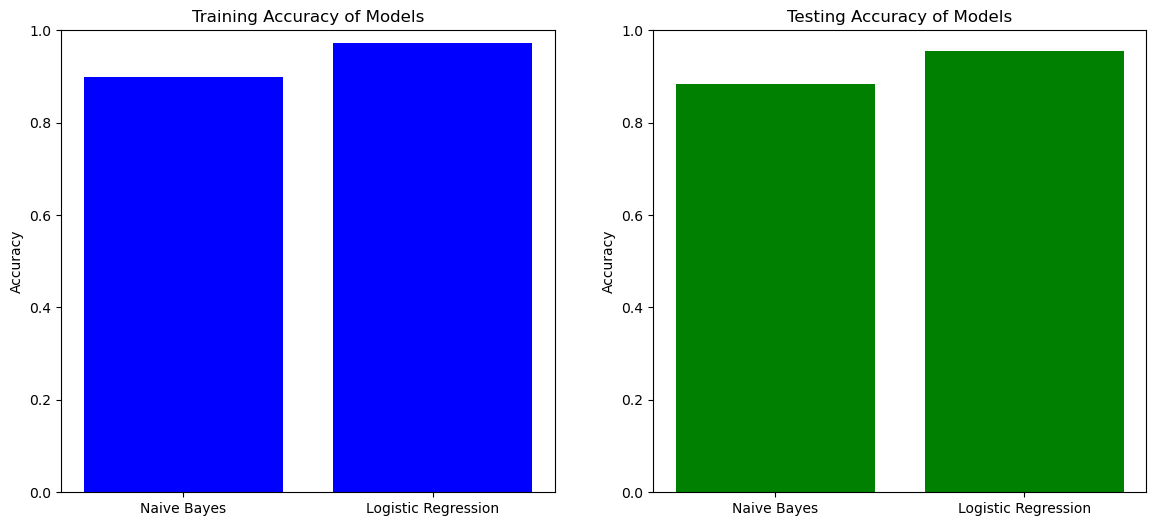

In [15]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
}
accuracies = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    accuracies["Model"].append(name)
    accuracies["Train Accuracy"].append(train_accuracy)
    accuracies["Test Accuracy"].append(test_accuracy)

    print(f"{name} Model - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

accuracy_df = pd.DataFrame(accuracies)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Accuracy Plots for all three models selected by us
ax[0].bar(accuracy_df["Model"], accuracy_df["Train Accuracy"], color='blue')
ax[0].set_title("Training Accuracy of Models")
ax[0].set_ylabel("Accuracy")
ax[0].set_ylim([0, 1])

#Testing Accuracy Plots for all three models selected by us
ax[1].bar(accuracy_df["Model"], accuracy_df["Test Accuracy"], color='green')
ax[1].set_title("Testing Accuracy of Models")
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim([0, 1])

plt.show()

In this comparison, Logistic Regression surpasses Naive Bayes, achieving superior training (97.16%) and testing (95.55%) accuracies, unlike Naive Bayes which scores (89.87%) and (88.40%) respectively. This indicates that Logistic Regression is more effective in generalizing to unseen data, rendering it the preferable choice for the given dataset and task.